<div class="markdown-google-sans">
  <h2>Mi az a Colab?</h2>
</div>

A Colab, vagyis „Colaboratory” segítségével Python-kódot írhat és futtathat böngészőjében, a következő előnyökkel:
- Nincs szükség konfigurációra
- Díjmentes GPU-hozzáférés
- Egyszerű megosztás

Legyen Ön <strong>hallgató</strong>, <strong>adattudós</strong> vagy <strong>AI-kutató</strong>, a Colab megkönnyítheti a munkáját. Nézze meg a <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colabot bemutató videót</a>, amelyben további információkat találhat, vagy csak vágjon bele alább!

# Resilient IT


In [3]:
pip install pm4py

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.5 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=a574920b84604833ffad55a810e8e9cba64195ef2ba77ad955753a59dc4436a7
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


In [16]:
import pandas as pd
import pm4py
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/exportgbiall01_05_all4.csv',sep=";",names = ['Timestamp','org:resource','case:concept:name', 'transaction', 'concept:name','dialog_steps', 'total response time (s)', 'av_resp_time_per_dialog_steps_in_ms', 'total CPU time(s)', 'average CPU time(ms)', 'total database time(s)'],usecols = [1,2,3,4,5,6,7,8,9,10,11])
#print(df)
logcost = pm4py.format_dataframe(df, case_id = 'case:concept:name', activity_key= 'concept:name', timestamp_key= 'Timestamp')
logcost['time:timestamp'] = pd.to_datetime(df.Timestamp)
print(type(df['dialog_steps'][0]))
df['dialog_steps'] = df['dialog_steps'].str.replace(',', '.')
df['dialog_steps'] = pd.to_numeric(df['dialog_steps'])
df['av_resp_time_per_dialog_steps_in_ms'] = df['av_resp_time_per_dialog_steps_in_ms'].str.replace(',', '.')
#df['average CPU time(ms)'] = pd.to_numeric(df['average CPU time(ms)'])
df['av_resp_time_per_dialog_steps_in_ms'] = pd.to_numeric(df['av_resp_time_per_dialog_steps_in_ms'])
print(df)

<class 'str'>


ValueError: Unable to parse string "100,00" at position 0

In [8]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'medium',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

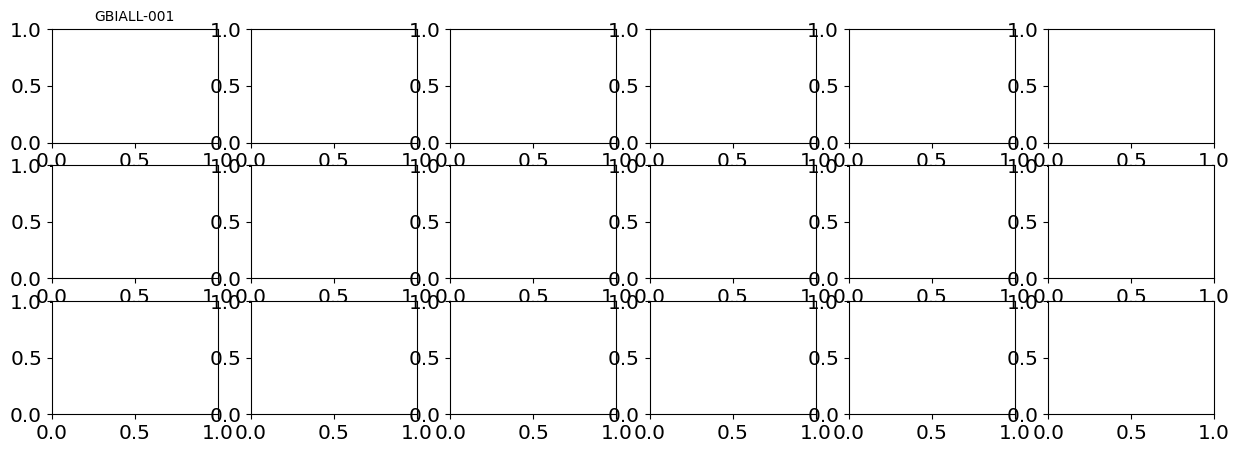

In [14]:
df0 = [x for _, x in df.groupby(df['org:resource'])]
#print(df0[1])
figure, axis = plt.subplots(3, 6)
for x in range(0, len(df0)):
  if x < 6:
    axis[0, x].set_title(df0[x]['org:resource'].values[1])
    axis[0, x].boxplot(df0[x]['dialog_steps'])
  else:
    if x < 12:
      axis[1, x - 6].set_title(df0[x]['org:resource'].values[1])
      axis[1, x - 6].boxplot(df0[x]['dialog_steps'])
    else:
      axis[2, x - 12].set_title(df0[x]['org:resource'].values[1])
      axis[2, x - 12].boxplot(df0[x]['dialog_steps'])
plt.show()



In [1]:
df0 = [x for _, x in df.groupby(df['transaction'])]
#print(df0[1])
figure, axis = plt.subplots(3, 3)
for x in range(0, len(df0)):
  if x < 3:
    axis[0, x].set_title(df0[x]['concept:name'].values[1])
    axis[0, x].boxplot(df0[x]['av_resp_time_per_dialog_steps_in_ms'])
  else:
    if x < 6:
      axis[1, x - 3].set_title(df0[x]['concept:name'].values[1])
      axis[1, x - 3].boxplot(df0[x]['av_resp_time_per_dialog_steps_in_ms'])
    else:
      axis[2, x - 6].set_title(df0[x]['concept:name'].values[1])
      axis[2, x - 6].boxplot(df0[x]['av_resp_time_per_dialog_steps_in_ms'])
plt.show()

NameError: name 'df' is not defined

filtered_dataframe = pm4py.filter_trace_attribute_values(
    log,
    'User',
    ['GBIALL-001'],
    case_id_key='case:concept:name'
)
filtered_dataframe

In [ ]:

for variant, subdf in pm4py.split_by_process_variant(logcost):
    print(variant)  # The definition of that particular variant
    #print(subdf)   ## the sub-dataframe (only that particular variant)
    subdf.to_csv('out.csv')
    print(f"There are {len(subdf)} of the the variant \t {variant}")


In [ ]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(logcost, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, initial_marking, final_marking)

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_dfg(dfg, start_activities, end_activities)

In [ ]:
transition_system = pm4py.discover_transition_system(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_transition_system(transition_system)



In [ ]:
print(pm4py.stats.get_case_duration(logcost, case_id = '8'))

In [ ]:
from matplotlib import pyplot as plt
case_duration = pm4py.get_all_case_durations(logcost)
print(case_duration)
attr = pm4py.get_event_attribute_values(logcost, 'org:resource')
attr2 = pm4py.get_event_attribute_values(logcost, 'dialog_steps')
attr3 = pm4py.get_event_attribute_values(logcost, 'transaction')

print(attr)
print(attr2)
x= attr.keys()
y = attr.values()
x2 = attr2.keys()
y2 = attr2.values()
x3 = attr3.keys()
y3 = attr3.values()
plt.figure(figsize=(30, 5))
plt.bar(x, y, color = 'red')
plt.show()
plt.bar(x2, y2, color = 'green')
plt.show()
plt.bar(x3, y3, color = 'purple')
plt.show()

In [ ]:
pm4py.get_start_activities(logcost)

In [ ]:
pm4py.get_end_activities(logcost)

In [ ]:
filt_log2 = pm4py.filter_start_activities(logcost, {'Create Vendor (Accounting)'})
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(filt_log2, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, initial_marking, final_marking)

bpmn_model = pm4py.discover_bpmn_inductive(filt_log2)
pm4py.view_bpmn(bpmn_model)

map = pm4py.discover_heuristics_net(filt_log2)
pm4py.view_heuristics_net(map)

In [ ]:
filtered_log = pm4py.filter_trace_attribute_values(
    logcost,
    'User',
    ['GBIALL-016'],
    case_id_key='case:concept:name'
)
map = pm4py.discover_heuristics_net(filtered_log)
pm4py.view_heuristics_net(map)


In [ ]:
process_tree = pm4py.discover_process_tree_inductive(logcost)
pm4py.view_process_tree(process_tree)

# Feldolgozás

In [ ]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfgcost = dfg_discovery.apply(logcost)
from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz = dfg_visualization.apply(dfgcost, log=logcost, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)


In [ ]:


dfg = pm4py.discover_dfg(logcost)
print(len(dfg))
for df2 in dfg:
  print(df2)
  print('\n')

In [ ]:
for i in range(0, len(logcost)-1):
  print(logcost['concept:name'][i] + "      " + logcost['concept:name'][i+1])

In [ ]:
logcost

In [ ]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

dfg = dfg_discovery.apply(logcost, variant=dfg_discovery.Variants.FREQUENCY)
gviz = dfg_visualization.apply(dfg, log=logcost,  variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)
print(dfg[('Change Document', 'Reverse Document')])
dfg[('Change Document', 'Reverse Document')] =6
gviz = dfg_visualization.apply(dfg, log=logcost,  variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)